In [11]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

In [12]:
file_path = 'df_dam.csv'
data = pd.read_csv(file_path)
data.head()


,Longitude,Latitude,Name,system:index,altitudeMo,begin,descriptio,end,extrude,icon,layer,path,tessellate,timestamp,visibility
0,-106.615059,40.967817,Colo_Dam_105,00000000000000000007,NaN,NaN,NaN,NaN,0,NaN,Colo_Dam_105 — FireDamsFairfax/ColoradoDams/Co...,/vsizip/C:/Users/Hutch/Downloads/FireDamsFairf...,1,NaN,-1
1,-106.615024,40.967862,Colo_Dam_105,00000000000000000007,NaN,NaN,NaN,NaN,0,NaN,Colo_Dam_105 — FireDamsFairfax/ColoradoDams/Co...,/vsizip/C:/Users/Hutch/Downloads/FireDamsFairf...,1,NaN,-1
2,-106.615001,40.967879,Colo_Dam_105,00000000000000000007,NaN,NaN,NaN,NaN,0,NaN,Colo_Dam_105 — FireDamsFairfax/ColoradoDams/Co...,/vsizip/C:/Users/Hutch/Downloads/FireDamsFairf...,1,NaN,-1
3,-106.614935,40.967897,Colo_Dam_105,00000000000000000007,NaN,NaN,NaN,NaN,0,NaN,Colo_Dam_105 — FireDamsFairfax/ColoradoDams/Co...,/vsizip/C:/Users/Hutch/Downloads/FireDamsFairf...,1,NaN,-1
4,-106.614881,40.967906,Colo_Dam_105,00000000000000000007,NaN,NaN,NaN,NaN,0,NaN,Colo_Dam_105 — FireDamsFairfax/ColoradoDams/Co...,/vsizip/C:/Users/Hutch/Downloads/FireDamsFairf...,1,NaN,-1


In [13]:
def find_center_of_dam(data):
    center_longitude = (data['Longitude'].min() + data['Longitude'].max()) / 2
    center_latitude = (data['Latitude'].min() + data['Latitude'].max()) / 2
    return center_longitude, center_latitude

def find_perpendicular_closest_point(data, center_point):
    center_point_geom = Point(center_point)
    line = LineString(data[['Longitude', 'Latitude']].values)
    closest_point_geom = line.interpolate(line.project(center_point_geom))
    return closest_point_geom.x, closest_point_geom.y


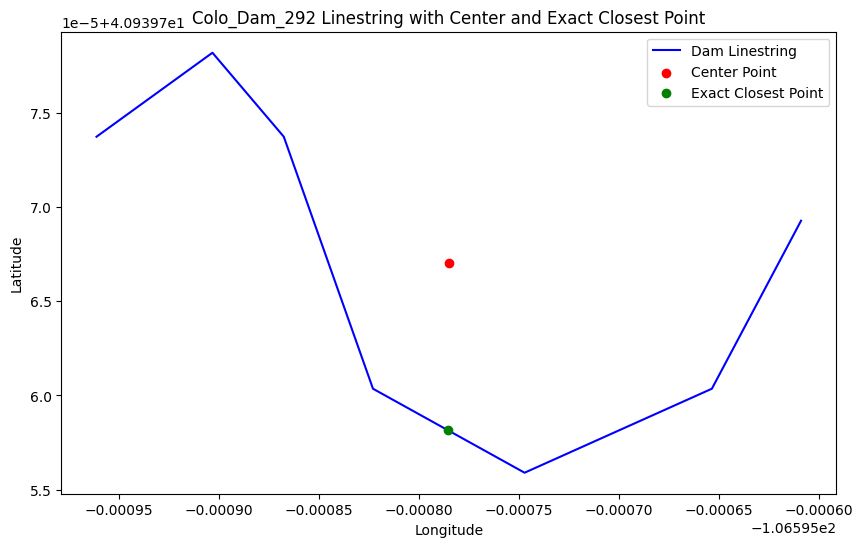

In [17]:
dam_groups = data.groupby('Name')
dam_name = 'Colo_Dam_292'
selected_dam_data = dam_groups.get_group(dam_name)
center_point = find_center_of_dam(selected_dam_data)
exact_closest_point = find_perpendicular_closest_point(selected_dam_data, center_point)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(selected_dam_data['Longitude'], selected_dam_data['Latitude'], label='Dam Linestring', color='blue')
plt.scatter(*center_point, color='red', zorder=5, label='Center Point')
plt.scatter(*exact_closest_point, color='green', zorder=5, label='Exact Closest Point')
plt.title(f'{dam_name} Linestring with Center and Exact Closest Point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [36]:
def find_center_on_linestring(data):
    # Calculate the cumulative distance along the linestring for each point
    distances = [0]
    for i in range(1, len(data)):
        # Calculate the distance between consecutive points
        point1 = data.iloc[i - 1]
        point2 = data.iloc[i]
        segment_length = np.hypot(point2['Longitude'] - point1['Longitude'],
                                  point2['Latitude'] - point1['Latitude'])
        distances.append(distances[-1] + segment_length)

    # Find the center point in the 1D space
    total_length = distances[-1]
    center_distance = total_length / 2
    print("cumulative distances: ", distances)
    print()
    print("center distance: ",center_distance)
    # Find the corresponding segment on the linestring where the center point falls
    for i in range(len(distances) - 1):  # We need to stop at the second to last index
        if distances[i] <= center_distance < distances[i + 1]:
            # The center is between the current point (i) and the next point (i + 1)
            proportion = (center_distance - distances[i]) / (distances[i + 1] - distances[i])
            # Interpolate between the two surrounding points to find the center point
            point1 = data.iloc[i]
            point2 = data.iloc[i + 1]
            center_longitude = point1['Longitude'] + proportion * (point2['Longitude'] - point1['Longitude'])
            center_latitude = point1['Latitude'] + proportion * (point2['Latitude'] - point1['Latitude'])
            return center_longitude, center_latitude

cumulative distances:  [0, 5.813956460005844e-05, 9.408998664244691e-05, 0.00014064436836895772, 0.0002165801230680159, 0.0003103273541431931, 0.00035580144072717274]

center distance:  0.00017790072036358637


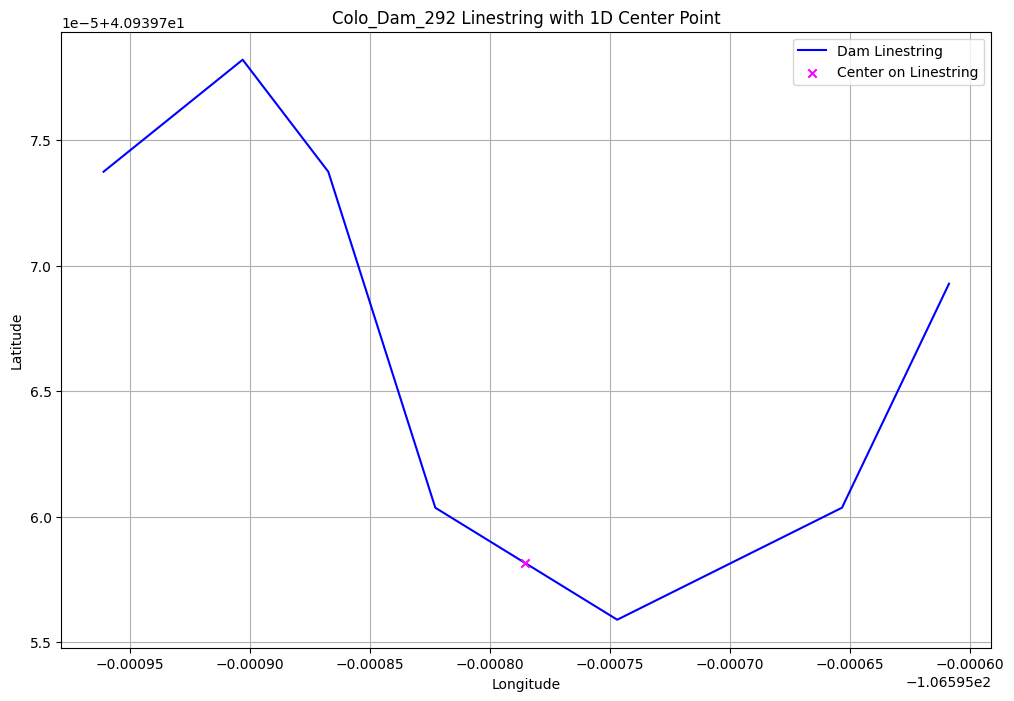

(-106.59578570650146, 40.93975817199632)

In [37]:
# Use the new function to find the center on the original linestring
center_on_linestring = find_center_on_linestring(selected_dam_data)

# Plotting the result
plt.figure(figsize=(12, 8))
plt.plot(selected_dam_data['Longitude'], selected_dam_data['Latitude'], label='Dam Linestring', color='blue')
plt.scatter(*center_on_linestring, color='magenta', zorder=5, label='Center on Linestring', marker='x')
plt.title(f'{dam_name} Linestring with 1D Center Point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

center_on_linestring
